# Supervised Learning and Linear Models.
## Instructions and Requirements:
This week workshop will have two sections:

*   Section-1: Multiple Linear Regression with Machine Learning Approach.
  *   Objectives:
      *   Understand the steps included in building Machine Learning Models.
  *   Datasets:
      *   "student.csv".
  *   Learning Outcomes:
      *   Get familiar with various steps in building Machine Learning Model.
      *   Implement and build Multiple Linear Regression from Scratch with python and Numpy.
*   Section-2: Introduction to SKLEARN.
  *   Objectives:
      *   Introduction of SKLEARN, a machine learning model building library.
  *   Learning Outcomes:
      *   Ger familiar with SKLEARN library.
      
## Requirements:
Notebook Environment(Jupyter or Google Colab)

*   Author: Siman Giri


# Regression Algorithm.
___

The task of the Regression Algorithm is to find the $\color{purple}{maping}$ function black to map the $\color{black}{input}$ variable $\textbf{(X)}$ to the continious output variable$\textbf{(Y)}$.

Regression analysis estimates the realtionship between a dependent variables and independent variables.
In the class we talked about two different approach

1.   Machine Learning Approach i.e Using Gradient Descent
In this exercise you are expected to implement both the methods from scratch.


# Section-1: Multiple Linear Regression With Machine Learning Approach.





##Implement Multiple Linear Regression with Gradient Descent From scratch.

Multiple Linear Regression is a type of Linear Regression when the input has multiple features ((variables)).Similar to Simple Linear Regression, we have input variable(X) and output variable(Y). But the input variable has nn features. Therefore, we can represent this linear model as follows;
\begin{align}
        \mathbf{Y} = \theta_o + \theta_1x_1 + \theta_2x_2 + .....+ \theta_nx_n
    \end{align}
Rewriting the equation:where $x_0 = 1$:
\begin{align}
        \mathbf{Y} = \theta_ox_0 + \theta_1x_1 + \theta_2x_2 + .....+ \theta_nx_n
    \end{align}
Convert the equation to matrix:
\begin{align}
        \mathbf{Y} = \theta^T X + \theta_0
    \end{align}
where:
\begin{align}
        \mathbf{\theta} = [\theta_o, \theta_1, ...., \theta_n]^T
    \end{align}
\begin{align}
        \mathbf{X} = [x_o, x_1, ...., x_n]^T
    \end{align}

Our function can now be defined as:
\begin{align}
        \mathbf{h_\theta(.)}  = \theta^T x
    \end{align}
And the cost function will be:
\begin{align}
        \mathbf{J(\theta)}  = \frac{1}{2n} \sum_{i=1}^n(h_\theta(x_i) - y_i)^2
    \end{align}

Implementation:

Start with Necessary Imports:


In [26]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google'

In [27]:
path2 = "student.csv"

In [28]:
# Necessary imports:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10.0, 10.0)

## STEP-1: Define Decision Process.

*   Objective of the Task:
  *   To Predict the marks obtained in writing based on the marks of Math and Reading.
*   Tasks to Do:
  1.   Read and Observe the Dataset.
  2.   Print top(5) and bottom(5) of the dataset {Hint: pd.head and pd.tail}.
  3.   Print the Information of Datasets.
  3.   Identify $\color{red}{\textbf{Dependent}}$ $\color{red}{\textbf{Variable}}$ and $\color{red}{\textbf{Independent}}$ $\color{red}{\textbf{Variable}}$.
            *   {Hint: $\textbf{Variables}$ depends on the $\textbf{Objective}$ of the task.}
  1.   Split the data into Independent and Dependent Arrays { Hint: Split and Convert pandas dataframe to numpy arrays-You can use df.to_numpy()}.
  6. Visualize the dataset, Visualizing multi-variate dataset is not easy, In this particular case we can use special 3-D plot, Please go through the code.

In [29]:
dataset = pd.read_csv(path2)
dataset

,Math,Reading,Writing
0,48,68,63
1,62,81,72
2,79,80,78
3,76,83,79
4,59,64,62
...,...,...,...
995,72,74,70
996,73,86,90
997,89,87,94
998,83,82,78


In [30]:
dataset.head(5)

,Math,Reading,Writing
0,48,68,63
1,62,81,72
2,79,80,78
3,76,83,79
4,59,64,62


In [31]:
dataset.tail(5)

,Math,Reading,Writing
995,72,74,70
996,73,86,90
997,89,87,94
998,83,82,78
999,66,66,72


In [32]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   Math     1000 non-null   int64
 1   Reading  1000 non-null   int64
 2   Writing  1000 non-null   int64
dtypes: int64(3)
memory usage: 23.6 KB


In [33]:
math = dataset['Math'].to_numpy()
read = dataset['Reading'].to_numpy()
write = dataset['Writing'].to_numpy()

In [34]:
# Sanity Check
if math.shape == read.shape == write.shape:
  print("Proceed Further")
else:
  print("Array Conversion Error: Try Again")

Proceed Further


### Visualize the Dataset.

In [60]:
from mpl_toolkits.mplot3d import Axes3D
# Ploting the scores as scatter plot
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(math, read, write, color='#ef1234')
plt.show()

<Figure size 1000x1000 with 0 Axes>

### Store the arrays in the Matrix Form:
Implement Following Equations:

\begin{align}
        \mathbf{Y} = \theta^T X + \theta_0
    \end{align}
In Machine Learning parameters $\theta$ are also called weights, so from this step onwards we represent $\theta$ as $\textbf{W}$.

Here-Now:
\begin{align}
        \mathbf{Y} = W^T X + W_0
    \end{align}

\begin{align}
        \mathbf{W} = [\theta_o, \theta_1, ...., \theta_n]^T
    \end{align}
\begin{align}
        \mathbf{X} = [x_o, x_1, ...., x_n]^T
    \end{align}

In [36]:
import numpy as np

# Define the feature vector X
X = np.array([1,2,3,4]) 

# Define the weight vector W
W = np.array([0.5,0.5,1.5,0.5])

# Compute the predicted output Y
Y = np.dot(W.T, X)  # Dot product of W transpose and X

print(Y)


8.0


## Step-2: Implement a Error/Cost Function.

We will use the Cost function: Mean Square Error i.e.
\begin{align}
        \mathbf{J(\theta)}  = \frac{1}{2m} \sum_{i=1}^m(y_{pred} - y_i)^2
    \end{align}

Further Simplifications:

\begin{align}
        \mathbf{J(\theta)}  = \frac{1}{2m} \sum_{i=1}^m(h_\theta(x_i) - y_i)^2
    \end{align}
Here:
\begin{align}
  h_\theta = \theta_1*x
    \end{align}

Note:
In Machine Learning, m: denotes the length of the array (total No of rows in our case).



In [45]:
#Define the cost function
def cost_function(X, Y, W):
    """ Parameters:
    This function finds the Mean Square Error.
    Input parameters:
      X: Feature Matrix
      Y: Target Matrix
      W: Weight Matrix
    Output Parameters:
      J: accumulated mean square error.
    """
   # Calculate predictions
    predictions = X.dot(W)
    
    # Compute the squared differences
    squared_errors = (predictions - Y) ** 2
    
    # Mean of squared errors
    J = squared_errors.mean()
    
    return J

In [46]:
X = np.array([[2]])
Y = np.array([[2]])
W = np.array([[2]])

initial_cost = cost_function(X, Y, W)
print(initial_cost)

4.0


## Step-3: Optimization Algorithm

Our goal in this task is to minimize our error function with each input of examples(input data).
One of the most suitable methods to do the same is
\begin{align}
$\color{red}{\textbf{GRADIENT DESCENT ALGOROTHIM.}}$
\end{align}

Implement GDA from Scratch.

Function to estimate:
  *   $h_\theta(x) = \theta^T x$

Loss function to minimize:
  *   $(h_\theta(x) - y)^2$

Gradient: Decsent update:
  *   $\theta_(j+1)   = \theta_j - LR(D_\theta)$
  *   $D(\theta) = 1/m * (\theta^T * X)$ i.e. Derivative of parameters/weights.





In [47]:
def gradient_descent(X, Y, W, alpha, iterations):
    """
    Parameters:
    X: Feature matrix
    Y: Target matrix
    W: Weight matrix
    alpha: Learning rate
    iterations: Number of iterations
    Returns:
    W: Optimized weights
    cost_history: List of cost values across iterations
    """
    cost_history = [0] * iterations
    m = len(Y)  # Number of training examples

    for iteration in range(iterations):
        # Hypothesis Values
        Y_pred = X.dot(W)
        
        # Difference between Hypothesis and Actual Y
        loss = Y_pred - Y
        
        # Gradient Calculation
        dw = (1 / m) * X.T.dot(loss)
        
        # Update Weights using Gradient
        W = W - alpha * dw
        
        # Compute and Store New Cost Value
        cost = cost_function(X, Y, W)
        cost_history[iteration] = cost

    return W, cost_history

In [50]:
# Initialize data
X = np.array([[1, 2], [1, 3], [1, 4], [1, 5]])  # Feature matrix with bias term
Y = np.array([[5], [7], [9], [11]])  # Target values
W = np.array([[0], [0]])  # Initial weights
alpha = 0.01  # Learning rate
iterations = 1000  # Number of iterations

# Run gradient descent
optimized_weights, cost_history = gradient_descent(X, Y, W, alpha, iterations)

# Output results
print("Optimized Weights:", optimized_weights)
print("Final Cost:", cost_history[-1])


Optimized Weights: [[0.81201193]
 [2.04905277]]
Final Cost: 0.0032735177826713354


## Step-4: Evaluate a Model.

In this section, we will use $b_1$ and $b_0$ calculated from step-2 to make a prediction.

Lets see How Good is our model. As discussed in the lecture and Tutorial we will use Root Mean Squared Error and Coefficient of Determination( R2 )
Mathematically:
\begin{align}
        \mathbf{RMSE}  = \sqrt{\sum_{i=1}^n (1/m (\hat{y_i} - y_i)^2)}
    \end{align}

\begin{align}
        \mathbf{R^2}  = 1 - \frac{SSR}{SST}
    \end{align}

\begin{align}
         \mathbf{SST} = \sum_{i=1}^n (y_i - \bar{y})^2
    \end{align}
\begin{align}
         \mathbf{SSR} = \sum_{i=1}^n (y_i - \hat{y_i})^2
    \end{align}

In [51]:
# Model Evaluation - RMSE
def rmse(Y, Y_pred):
    """
    This Function calculates the Root Mean Squared Error (RMSE).
    Input Arguments:
      Y: Array of actual (Target) Dependent Variables.
      Y_pred: Array of predicted Dependent Variables.
    Output Arguments:
      rmse: Root Mean Square Error.
    """
    mse = ((Y - Y_pred) ** 2).mean()  # Mean Squared Error
    rmse = np.sqrt(mse)  # Square Root of MSE
    return rmse
    
# Model Evaluation - R2
def r2(Y, Y_pred):
    """
    This Function calculates the R-Squared Error.
    Input Arguments:
      Y: Array of actual (Target) Dependent Variables.
      Y_pred: Array of predicted Dependent Variables.
    Output Arguments:
      r2: R-Squared Error.
    """
    mean_y = np.mean(Y)  # Mean of actual values
    ss_tot = ((Y - mean_y) ** 2).sum()  # Total sum of squares
    ss_res = ((Y - Y_pred) ** 2).sum()  # Residual sum of squares
    r2 = 1 - (ss_res / ss_tot)  # R-squared formula
    return r2


# Let's Check Model Performance:


In [52]:
X2 = np.array([[1, 2], [1, 3], [1, 4], [1, 5]])  # Feature matrix with bias
Y2 = np.array([[5], [7], [9], [11]])  # Target matrix

new_weights = np.array([[0.81201193], [2.04905277]])

# Predicted values
Y_pred = X2.dot(new_weights)

# Evaluation
print("RMSE:", rmse(Y2, Y_pred))
print("R^2:", r2(Y2, Y_pred))


RMSE: 0.05721466457326972
R^2: 0.9993452964315537


# Section-2: Introduction to SKLEARN.
What is scikit-learn or sklearn?
>  

1.   Scikit-learn is probably the most useful library for machine learning in python.
2.   The sklearn library contains a lot of efficient tools for machine learning and statistical modeling

> Please note that sklearn is used to build machine learning models. It should not be used for reading the data, manipulating and summarizing it. There are better libraries for that (e.g. NumPy, Pandas etc.)


## Build Linear Regression with help of SKLEARN.


In [53]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# X and Y Values
X = np.array([math, read]).T
Y = np.array(write)

# Model Intialization
reg = LinearRegression()
# Data Fitting
reg = reg.fit(X, Y)
# Y Prediction
Y_pred = reg.predict(X)

# Model Evaluation
rmse = np.sqrt(mean_squared_error(Y, Y_pred))
r2 = reg.score(X, Y)

print(rmse)
print(r2)

4.572887051836439
0.9098901726717316


# Practise Tasks:

For the following Datasets:


Insurance.csv: Try implementing Multiple Linear Regression from Scratch: While Doing that also practise following:
  1.   Can you Identify Qualitative and Quantitative Varaible.
  2.   Drop all the Qualitative Varaible from the dataframe.
  3.   If you do not want to drop the qualitative varaible, you can convert them into numeric variable as you did in Assignment-1. {You can also try sklearn label encoder function.}
  4.   Practise your Visualization Skills.
  



C:\Users\LOQ\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


RMSE: 4.788030543283847
R2 Score: 0.9084155129001201


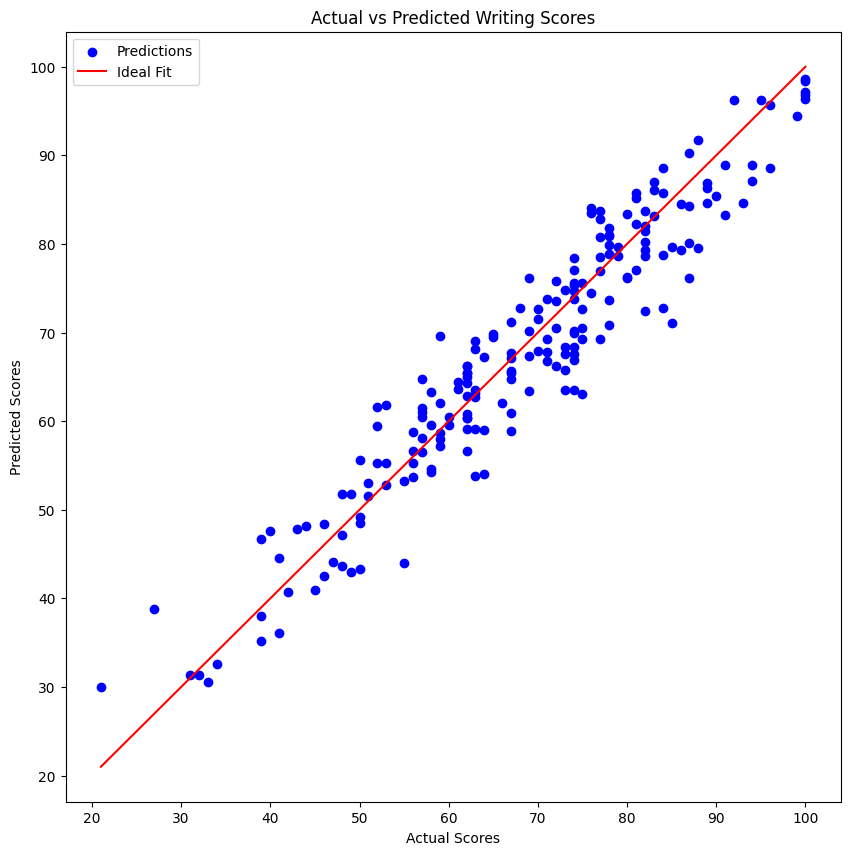

In [59]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load Dataset
data = pd.read_csv('student.csv')

# Assuming 'Writing' is the target variable
X = data[['Math', 'Reading']]  # Features
Y = data['Writing']  # Target

# Split Data (80% train, 20% test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Train Model
reg = LinearRegression()
reg.fit(X_train, Y_train)

# Predict
Y_pred = reg.predict(X_test)

# Evaluate
rmse = mean_squared_error(Y_test, Y_pred, squared=False)
r2 = r2_score(Y_test, Y_pred)

print("RMSE:", rmse)
print("R2 Score:", r2)

# Visualize Predictions
plt.scatter(Y_test, Y_pred, color='blue', label='Predictions')
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], color='red', label='Ideal Fit')
plt.xlabel('Actual Scores')
plt.ylabel('Predicted Scores')
plt.title('Actual vs Predicted Writing Scores')
plt.legend()
plt.show()